In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
# Baca file Excel
df = pd.read_excel("DATASET_PREDIKSI_HARGA_RUMAH.xlsx")

In [57]:
# Lihat beberapa data awal
df.head(10)

,NAMA RUMAH,HARGA,LUAS_BANGUNAN,LUAS_TANAH,KAMAR_TIDUR,KAMAR_MANDI,GARASI
0,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


In [58]:
df.shape

(1010, 7)

In [59]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,HARGA,LUAS_BANGUNAN,LUAS_TANAH,KAMAR_TIDUR,KAMAR_MANDI,GARASI
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [60]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

NAMA RUMAH       0
HARGA            0
LUAS_BANGUNAN    0
LUAS_TANAH       0
KAMAR_TIDUR      0
KAMAR_MANDI      0
GARASI           0
dtype: int64

In [61]:
# # Menghapus satu kolom
df = df.drop(columns=["NAMA RUMAH"])

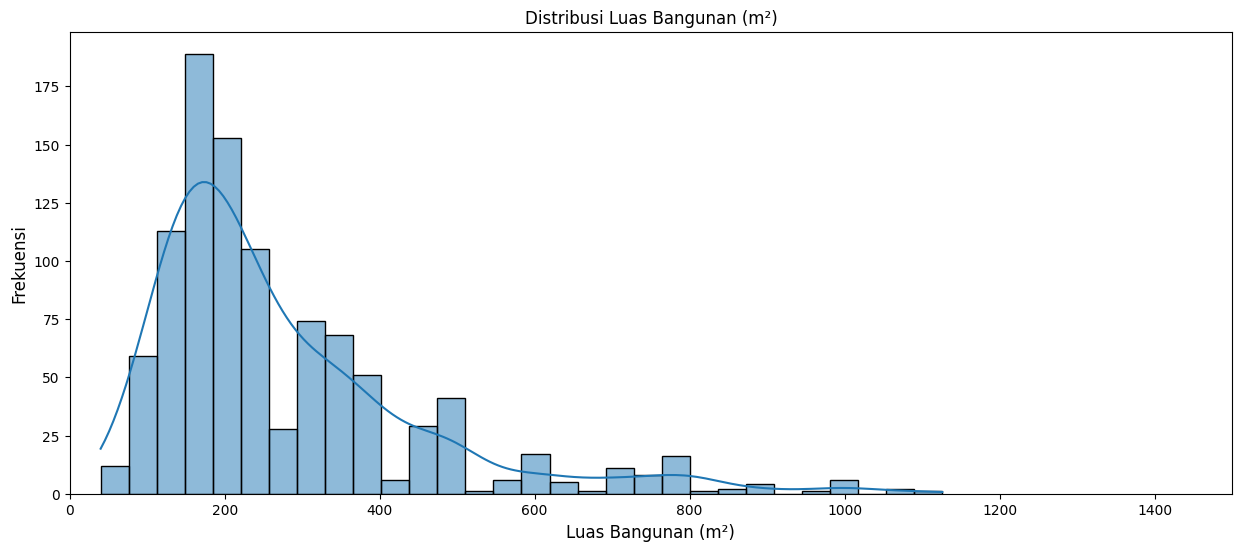

In [62]:
f = plt.figure(figsize=(15,6)) # Perbesar ukuran gambar

# Filter data di bawah 2500
df_filtered = df[df['LUAS_BANGUNAN'] <= 2500]

sns.histplot(data=df_filtered, x='LUAS_BANGUNAN', kde=True, bins=30)
plt.title('Distribusi Luas Bangunan (m²)', )
plt.xlabel('Luas Bangunan (m²)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Batasi range sumbu x dari 0 sampai 2000
plt.xlim(0, 1500)
plt.show()


Text(0, 0.5, 'Frekuensi')

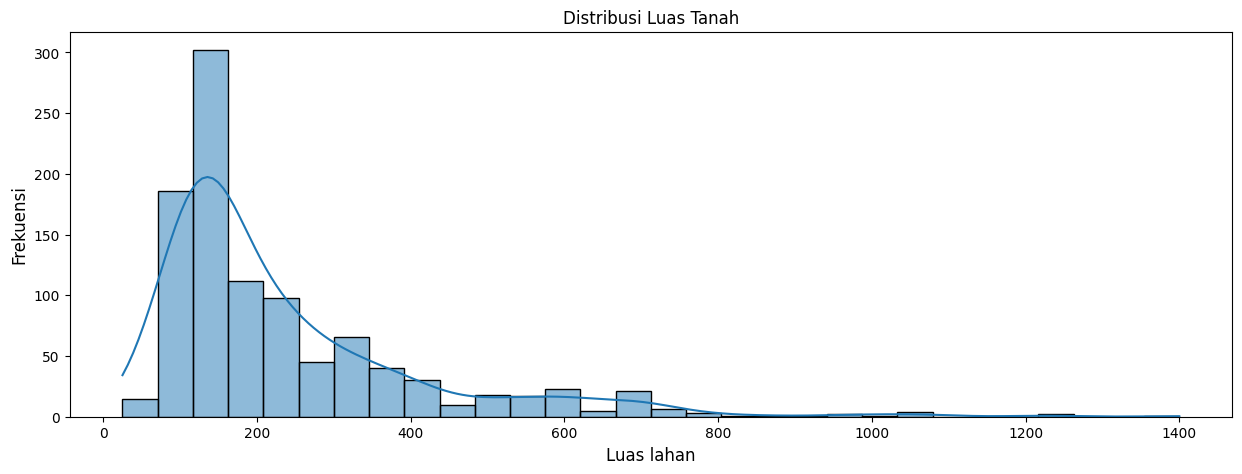

In [63]:
f = plt.figure(figsize=(15,5)) # Perbesar ukuran gambar

# Filter data di bawah 2500
df_filtered = df[df['LUAS_TANAH'] <= 2500]


sns.histplot(data=df_filtered, x='LUAS_TANAH', kde=True, bins=30)
plt.title('Distribusi Luas Tanah', )
plt.xlabel('Luas lahan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

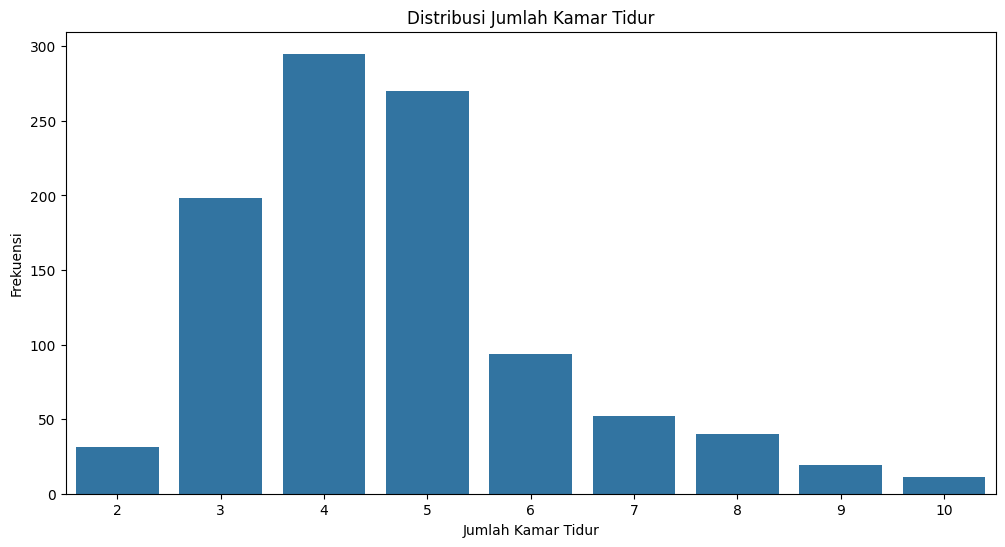

In [64]:
plt.figure(figsize=(12, 6))  # Perbesar ukuran gambar

# Buat count plot
sns.countplot(data=df, x='KAMAR_TIDUR')

# Tambahkan judul dan label
plt.title('Distribusi Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Frekuensi')
plt.show()

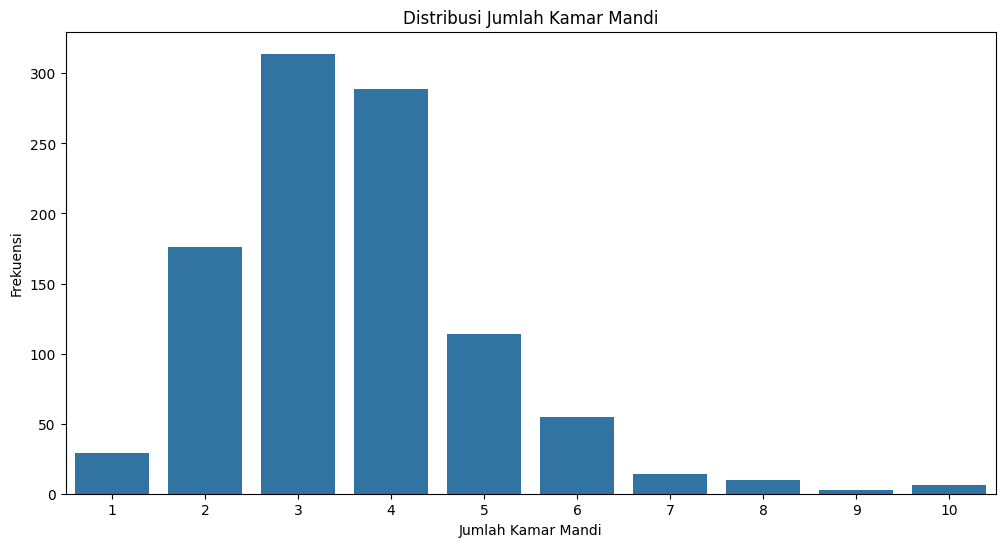

In [65]:
plt.figure(figsize=(12, 6))  # Perbesar ukuran gambar

# Buat count plot
sns.countplot(data=df, x='KAMAR_MANDI')

# Tambahkan judul dan label
plt.title('Distribusi Jumlah Kamar Mandi')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Frekuensi')
plt.show()

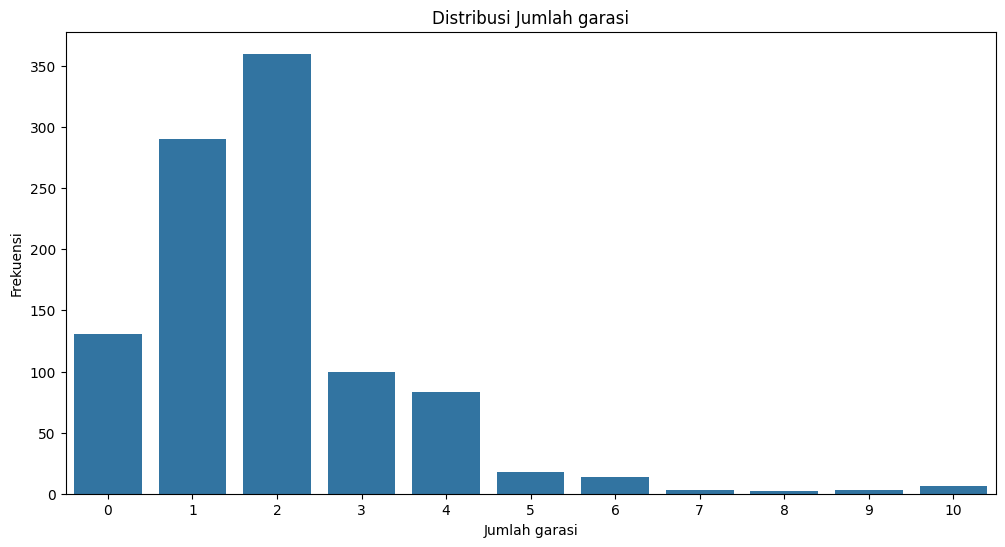

In [66]:
plt.figure(figsize=(12, 6))  # Perbesar ukuran gambar

# Buat count plot
sns.countplot(data=df, x='GARASI')

# Tambahkan judul dan label
plt.title('Distribusi Jumlah garasi')
plt.xlabel('Jumlah garasi')
plt.ylabel('Frekuensi')

plt.show()

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

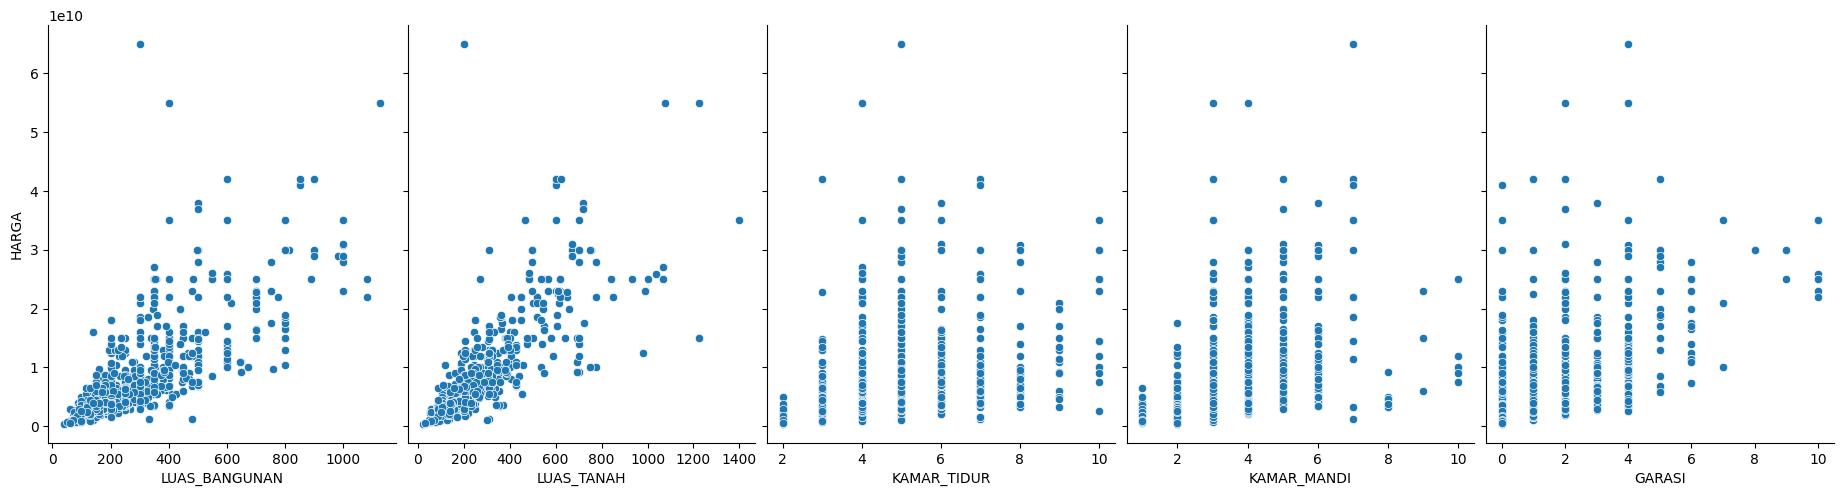

In [67]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LUAS_BANGUNAN', 'LUAS_TANAH', 'KAMAR_TIDUR', 'KAMAR_MANDI', 'GARASI'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

In [68]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable
# df.corr().style.background_gradient(cmap="coolwarm").format("{:.2f}")

In [69]:
#Recall data kita
df.head()

,HARGA,LUAS_BANGUNAN,LUAS_TANAH,KAMAR_TIDUR,KAMAR_MANDI,GARASI
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [70]:
#Pertama, buat variabel x dan y
x = df.drop(columns='HARGA')
y = df['HARGA']

In [71]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [72]:
#Ketiga, kita bikin object linear regresi
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [73]:
print("Koefisien (b1-b5):", model.coef_.tolist())
print("Intercept:", model.intercept_)

y_pred = model.predict(x_test)

Koefisien (b1-b5): [12285254.07036815, 23268141.951857887, -638754626.4738376, 556618859.4511906, 247983447.7381631]
Intercept: -775923911.9377851


In [74]:
print("Akurasi : ", model.score(x_test, y_test))

Akurasi :  0.7713134894077546


In [75]:
# Contoh data baru (misalnya: 'LUAS_BANGUNAN', 'LUAS_TANAH', 'KAMAR_TIDUR', 'KAMAR_MANDI', 'GARASI')
data_baru = np.array([[250, 250, 7, 7, 4]])

# Membulatkan dan memformat sebagai mata uang
prediksi_harga = model.predict(data_baru)
prediksi_harga_rounded = round(prediksi_harga[0])
harga_formatted = f'Rp {prediksi_harga_rounded:,.0f}'

print(f'Harga rumah untuk data yang anda berikan adalah : {harga_formatted}')

Harga rumah untuk data yang anda berikan adalah : Rp 8,529,408,515


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
# # Jika prediksi harga negatif, ubah menjadi 0 dan round ke bawah
# if prediksi_harga[0] < 0:
#     prediksi_harga[0] = 0
#     prediksi_harga_rounded = round(prediksi_harga[0])
#     harga_formatted = f'Rp {prediksi_harga_rounded}'